In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['STFangsong']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
%config InlineBackend.figure_format = 'svg'

In [6]:
import math
n = 300
p = 0.01
def bs(n):
    for k in range(n+1):
        c = math.factorial(n) // math.factorial(k) // math.factorial(n-k)
        r = c * p ** k * (1-p) ** (n-k)
        print(k,':',r)
bs(n)

0 : 0.04904089407128572
1 : 0.14860876991298705
2 : 0.22441425355547034
3 : 0.2251698571027952
4 : 0.16887739282709638
5 : 0.1009852692461021
6 : 0.050152616881481676
7 : 0.021276867767901317
8 : 0.00787136648484228
9 : 0.0025796172991851252
10 : 0.0007582511455180519
11 : 0.00020192179265402668
12 : 4.9120705452031735e-05
13 : 1.099204597527983e-05
14 : 2.2761307322549143e-06
15 : 4.3836591880465016e-07
16 : 7.887265584553366e-08
17 : 1.3309467771914176e-08
18 : 2.113680908783228e-09
19 : 3.1688358122108993e-10
20 : 4.49718617793567e-11
21 : 6.056816401260164e-12
22 : 7.758731753680374e-13
23 : 9.472672057633482e-14
24 : 1.1043477104227589e-14
25 : 1.2315150225320461e-15
26 : 1.3157211779188526e-16
27 : 1.3487003469875261e-17
28 : 1.3282654932452909e-18
29 : 1.258405482977078e-19
30 : 1.1482420400228557e-20
31 : 1.0101836129233336e-21
32 : 8.577632319330072e-23
33 : 7.036441572024669e-24
34 : 5.581491086543632e-25
35 : 4.2847810361345063e-26
36 : 3.185934272097767e-27
37 : 2.296168844

### 数据分析的一般流程

1. 提取数据（筛选）

    - 布尔索引
    - `query()`：相当于布尔索引
    - `drop()`：删除指定的行或列
    - `rename()`：重命名行或列索引
    - `reset_index()`：重置索引（将索引变成普通列）
    - `set_index()`：设置索引（将一个列或多个列指定为索引）
    - `reindex()`：调整行或列索引的顺序（还可以做花式索引）

2. 整合和重塑

    - `merge()`：实现两个DataFrame对象的内连接或外连接（适用于两张表有关联）。
    - `concat()`：将两个或多个DataFrame的数据拼接到一起（适用于多张表结构一致）。

3. 数据清洗（缺失值、重复值、异常值）

    - 缺失值：
        - `dropna()`：删除空值
        - `fillna()`：填充空值 <--- 均值、中位数、众数
        - `isnull()` / `notnull()`：判断空值
    
    - 重复值：
        - `duplicated()`：判断是否重复
        - `drop_duplicates()`：删除重复值
    
    - 异常值：
        - 异常值 / 极端值 / 离群值
        - `drop()`：删除
        - `replace()`：替换
        
    - 预处理：
        - `apply()`：将函数作用到数据上，需要指定在哪个轴上执行
        - `transform()`：将（多个）函数作用到数据上
        - `applymap()`：对每个元素使用指定的函数进行映射，相当于`Series`上的`map()`方法 ---> elementwise
        
     > 注意：这三个方法都是高阶函数的用法，`apply()`方法接受的函数，可以是带归约性质的函数（聚合函数），也可以是没有归约性质的函数。`transform()`方法接受的函数不能是带归约功能的函数，只能是对数据做变换的函数，简单的说就是函数的执行不会减少数据的量。

4. 数据透视（排序、分组、聚合）

    - 透视表：根据A统计B（根据A列对数据进行分组，再对B列上聚合函数）
    - `groupby()` ---> `sum()` / `mean()` / `max()` / ...
    - `pivot_table()` ---> 专门生成透视表的函数
    - `cut()` --->  数据离散化（分箱）

5. 数据可视化（统计图表）

6. 数据的洞察（发现问题给出建议）

### Example 1

In [3]:
df = pd.read_csv('../files/data/bilibili.csv',encoding = 'GBK')
df

,title,url,watchnum,dm,uptime,upname
0,阿里云大学课程（云计算、中间件、大数据、云安全）,//www.bilibili.com/video/BV1Lv411s7wu?from=search,2954,4,2021/1/21,韭菜滚雪球
1,视觉传达设计专业的小朋友大学课程有哪些，强度怎么样，需要什么技能？学姐给新生的解答与建议,//www.bilibili.com/video/BV1Ea4y1a7CX?from=search,3526,8,2020/7/25,铧仔仔儿的奋斗史
2,CAP：适合高中生的大学课程（上大学之前提前学习大学的课程）同济大学《微积分CAP》,//www.bilibili.com/video/BV1X4411Y7u8?from=search,5597,17,2019/5/11,愚甘杂货铺
3,干货！论文读写系列｜写作风格：例文解析（1）｜人文社科｜教育学｜大学课程、知识,//www.bilibili.com/video/BV1VC4y1b7ZA?from=search,1.1万,29,2020/7/26,cici西西熙熙
4,《用户体验与心理-第1期》大学课程,//www.bilibili.com/video/BV1r7411M7gY?from=search,1373,9,2020/2/24,Luka老师
...,...,...,...,...,...,...
1902,【中国石油大学】构造地质学（第1-2章） ——主讲：李理老师,//www.bilibili.com/video/BV1Y4411x7sE?from=search,4097,5,2019/5/2,點點滴滴Super
1903,【模电】模拟电子技术基础【四】,//www.bilibili.com/video/BV1sb411v7E6?from=search,5997,11,2019/3/8,干脆的非洲鼓
1904,【模电】模拟电子技术基础【三】,//www.bilibili.com/video/BV1Rb411i7yo?from=search,4713,8,2019/3/5,干脆的非洲鼓
1905,结构化学-东北大学-王军,//www.bilibili.com/video/BV1yb411t7Mb?from=search,5835,2,2019/2/28,万万万万不能怂


In [4]:
def handle_num(n):
    if n[-1] == '万':
        return int(float(n[:-1]) * 10000)
    return int(n)

df['watchnum'] = df.watchnum.map(handle_num)
df['dm'] = df.dm.map(handle_num)
df

,title,url,watchnum,dm,uptime,upname
0,阿里云大学课程（云计算、中间件、大数据、云安全）,//www.bilibili.com/video/BV1Lv411s7wu?from=search,2954,4,2021/1/21,韭菜滚雪球
1,视觉传达设计专业的小朋友大学课程有哪些，强度怎么样，需要什么技能？学姐给新生的解答与建议,//www.bilibili.com/video/BV1Ea4y1a7CX?from=search,3526,8,2020/7/25,铧仔仔儿的奋斗史
2,CAP：适合高中生的大学课程（上大学之前提前学习大学的课程）同济大学《微积分CAP》,//www.bilibili.com/video/BV1X4411Y7u8?from=search,5597,17,2019/5/11,愚甘杂货铺
3,干货！论文读写系列｜写作风格：例文解析（1）｜人文社科｜教育学｜大学课程、知识,//www.bilibili.com/video/BV1VC4y1b7ZA?from=search,11000,29,2020/7/26,cici西西熙熙
4,《用户体验与心理-第1期》大学课程,//www.bilibili.com/video/BV1r7411M7gY?from=search,1373,9,2020/2/24,Luka老师
...,...,...,...,...,...,...
1902,【中国石油大学】构造地质学（第1-2章） ——主讲：李理老师,//www.bilibili.com/video/BV1Y4411x7sE?from=search,4097,5,2019/5/2,點點滴滴Super
1903,【模电】模拟电子技术基础【四】,//www.bilibili.com/video/BV1sb411v7E6?from=search,5997,11,2019/3/8,干脆的非洲鼓
1904,【模电】模拟电子技术基础【三】,//www.bilibili.com/video/BV1Rb411i7yo?from=search,4713,8,2019/3/5,干脆的非洲鼓
1905,结构化学-东北大学-王军,//www.bilibili.com/video/BV1yb411t7Mb?from=search,5835,2,2019/2/28,万万万万不能怂


In [5]:
from datetime import datetime

# 将表中上传时间(字符串)转换为时间类型
# pd.to_datetime(字符串时间)
df['uptime'] = pd.to_datetime(df.uptime)
df.uptime   # dtype: datetime64[ns]

0      2021-01-21
1      2020-07-25
2      2019-05-11
3      2020-07-26
4      2020-02-24
          ...    
1902   2019-05-02
1903   2019-03-08
1904   2019-03-05
1905   2019-02-28
1906   2019-01-28
Name: uptime, Length: 1907, dtype: datetime64[ns]

In [6]:
df.uptime >= datetime(2021,1,1)   # 布尔数据系列

0        True
1       False
2       False
3       False
4       False
        ...  
1902    False
1903    False
1904    False
1905    False
1906    False
Name: uptime, Length: 1907, dtype: bool

In [7]:
[df.uptime >= datetime(2021,1,1)] # 布尔下标
temp = df[(df.uptime >= datetime(2021,1,1)) & (df.watchnum > 1000)]  #发布时间为2021年播放量大于1000的帖子
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 0 to 1425
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   title     92 non-null     object        
 1   url       92 non-null     object        
 2   watchnum  92 non-null     int64         
 3   dm        92 non-null     int64         
 4   uptime    92 non-null     datetime64[ns]
 5   upname    92 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 5.0+ KB


In [8]:
# 通过表达式筛选
# obj.query(筛选条件)
df.query('watchnum >= 1000 and uptime >="2021-1-1"').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 0 to 1425
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   title     92 non-null     object        
 1   url       92 non-null     object        
 2   watchnum  92 non-null     int64         
 3   dm        92 non-null     int64         
 4   uptime    92 non-null     datetime64[ns]
 5   upname    92 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 5.0+ KB


In [9]:
# 根据播放量排序
# obj.sort_values(by=[列1,列2...],ascending = True/False) 默认为True升序
temp.sort_values(by=['watchnum','dm'],ascending=False)

,title,url,watchnum,dm,uptime,upname
459,【公开课】复旦大学：资本论 王德峰（全28讲）,//www.bilibili.com/video/BV1Vp4y1x7F9?from=search,1099000,4299,2021-01-19,农夫CC
486,【公开课】北京大学：中国经济 林毅夫（全12讲）,//www.bilibili.com/video/BV1hK4y157dt?from=search,235000,561,2021-01-14,农夫CC
403,【公开课】温铁军：中国经济研究（8讲）,//www.bilibili.com/video/BV1kp4y1W7u8?from=search,106000,523,2021-01-27,农夫CC
448,【公开课】温铁军：中国经济研究（8讲）,//www.bilibili.com/video/BV1kp4y1W7u8?from=search,106000,523,2021-01-27,农夫CC
396,【公开课】加州大学洛杉矶分校：亲密关系（全17讲）,//www.bilibili.com/video/BV1xU4y147hJ?from=search,65000,79,2021-01-21,农夫CC
...,...,...,...,...,...,...
811,【芝加哥大学】 理解全球经济 全11讲,//www.bilibili.com/video/BV1nr4y1M7Fd?from=search,1189,0,2021-01-24,学习党加油站
923,2021年小黑老师计算机二级最新考点----替换考点汇总,//www.bilibili.com/video/BV1UU4y1s7Tq?from=search,1173,0,2021-02-01,爱家伙的小学习
1220,编程课堂：按键的前世今生学不会，不存在的。,//www.bilibili.com/video/BV1nK4y1W7bU?from=search,1157,3,2021-01-12,三月课堂
20,【生活篇】UCLA本科生带你了解加州大学课程设置与毕业要求,//www.bilibili.com/video/BV1qt4y1r7Y3?from=search,1107,8,2021-01-09,未必存在的真理


In [10]:
temp1 = temp.drop(columns='upname')
temp1

,title,url,watchnum,dm,uptime
0,阿里云大学课程（云计算、中间件、大数据、云安全）,//www.bilibili.com/video/BV1Lv411s7wu?from=search,2954,4,2021-01-21
20,【生活篇】UCLA本科生带你了解加州大学课程设置与毕业要求,//www.bilibili.com/video/BV1qt4y1r7Y3?from=search,1107,8,2021-01-09
374,【公开课】南开大学：中华诗词 叶嘉莹（20讲）,//www.bilibili.com/video/BV1Vo4y1d7Pe?from=search,4937,4,2021-02-10
384,【公开课】南开大学：中华诗词 叶嘉莹（20讲）,//www.bilibili.com/video/BV1Vo4y1d7Pe?from=search,4937,4,2021-02-10
387,【公开课】启功：中华书法（全4讲）,//www.bilibili.com/video/BV1FV411i7fV?from=search,9777,12,2021-02-11
...,...,...,...,...,...
1299,苏德矿教授谈如何学好微积分—矿爷在丹青有约2021.1.7直播,//www.bilibili.com/video/BV1dh41117yy?from=search,1196,0,2021-01-07
1412,【中英字幕】曼彻斯特大学Advanced Microeconomics 课程,//www.bilibili.com/video/BV1bX4y1K799?from=search,8429,2,2021-01-19
1417,《数字无线电系统基础》32讲-电子科技大学-陈祝明【通信专题】,//www.bilibili.com/video/BV1Ci4y1F7tU?from=search,3958,14,2021-01-05
1422,西安交通大学《电路》赵进全100讲,//www.bilibili.com/video/BV1Z54y1x7ZK?from=search,2205,3,2021-01-11


In [11]:
# 判断是否存在重复值
# temp.duplicated('url')
# 去重
temp.drop_duplicates('url')

,title,url,watchnum,dm,uptime,upname
0,阿里云大学课程（云计算、中间件、大数据、云安全）,//www.bilibili.com/video/BV1Lv411s7wu?from=search,2954,4,2021-01-21,韭菜滚雪球
20,【生活篇】UCLA本科生带你了解加州大学课程设置与毕业要求,//www.bilibili.com/video/BV1qt4y1r7Y3?from=search,1107,8,2021-01-09,未必存在的真理
374,【公开课】南开大学：中华诗词 叶嘉莹（20讲）,//www.bilibili.com/video/BV1Vo4y1d7Pe?from=search,4937,4,2021-02-10,农夫CC
387,【公开课】启功：中华书法（全4讲）,//www.bilibili.com/video/BV1FV411i7fV?from=search,9777,12,2021-02-11,农夫CC
392,所以你记住物价这个词了嘛！,//www.bilibili.com/video/BV1f54y1Y7JY?from=search,2140,0,2021-02-25,大阪外語学院
...,...,...,...,...,...,...
1299,苏德矿教授谈如何学好微积分—矿爷在丹青有约2021.1.7直播,//www.bilibili.com/video/BV1dh41117yy?from=search,1196,0,2021-01-07,稳及阁大学士
1412,【中英字幕】曼彻斯特大学Advanced Microeconomics 课程,//www.bilibili.com/video/BV1bX4y1K799?from=search,8429,2,2021-01-19,杨浦区老实人
1417,《数字无线电系统基础》32讲-电子科技大学-陈祝明【通信专题】,//www.bilibili.com/video/BV1Ci4y1F7tU?from=search,3958,14,2021-01-05,成电电子科协
1422,西安交通大学《电路》赵进全100讲,//www.bilibili.com/video/BV1Z54y1x7ZK?from=search,2205,3,2021-01-11,物语终焉2021


In [12]:
def normalize_url(url):
    if not url.startswith('https'):
        return 'https:' + url
    return url
df['url'] = df['url'].apply(normalize_url)
df

,title,url,watchnum,dm,uptime,upname
0,阿里云大学课程（云计算、中间件、大数据、云安全）,https://www.bilibili.com/video/BV1Lv411s7wu?fr...,2954,4,2021-01-21,韭菜滚雪球
1,视觉传达设计专业的小朋友大学课程有哪些，强度怎么样，需要什么技能？学姐给新生的解答与建议,https://www.bilibili.com/video/BV1Ea4y1a7CX?fr...,3526,8,2020-07-25,铧仔仔儿的奋斗史
2,CAP：适合高中生的大学课程（上大学之前提前学习大学的课程）同济大学《微积分CAP》,https://www.bilibili.com/video/BV1X4411Y7u8?fr...,5597,17,2019-05-11,愚甘杂货铺
3,干货！论文读写系列｜写作风格：例文解析（1）｜人文社科｜教育学｜大学课程、知识,https://www.bilibili.com/video/BV1VC4y1b7ZA?fr...,11000,29,2020-07-26,cici西西熙熙
4,《用户体验与心理-第1期》大学课程,https://www.bilibili.com/video/BV1r7411M7gY?fr...,1373,9,2020-02-24,Luka老师
...,...,...,...,...,...,...
1902,【中国石油大学】构造地质学（第1-2章） ——主讲：李理老师,https://www.bilibili.com/video/BV1Y4411x7sE?fr...,4097,5,2019-05-02,點點滴滴Super
1903,【模电】模拟电子技术基础【四】,https://www.bilibili.com/video/BV1sb411v7E6?fr...,5997,11,2019-03-08,干脆的非洲鼓
1904,【模电】模拟电子技术基础【三】,https://www.bilibili.com/video/BV1Rb411i7yo?fr...,4713,8,2019-03-05,干脆的非洲鼓
1905,结构化学-东北大学-王军,https://www.bilibili.com/video/BV1yb411t7Mb?fr...,5835,2,2019-02-28,万万万万不能怂


### Example 2

In [13]:
df1 = pd.read_csv('../files/data/lagou.csv',encoding = 'utf-8',index_col='no')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3140 entries, 0 to 3139
Data columns (total 51 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _id                    3140 non-null   object 
 1   adWord                 3140 non-null   int64  
 2   appShow                3140 non-null   int64  
 3   approve                3140 non-null   int64  
 4   businessZones          1544 non-null   object 
 5   city                   3140 non-null   object 
 6   companyFullName        3140 non-null   object 
 7   companyId              3140 non-null   int64  
 8   companyLabelList       3140 non-null   object 
 9   companyLogo            3139 non-null   object 
 10  companyShortName       3140 non-null   object 
 11  companySize            3140 non-null   object 
 12  createTime             3140 non-null   object 
 13  deliver                3140 non-null   int64  
 14  district               3133 non-null   object 
 15  educ

In [14]:
pd.set_option('max_columns', None)
df1.head()

,_id,adWord,appShow,approve,businessZones,city,companyFullName,companyId,companyLabelList,companyLogo,companyShortName,companySize,createTime,deliver,district,education,explain,financeStage,firstType,formatCreateTime,gradeDescription,hitags,imState,industryField,industryLables,isHotHire,isSchoolJob,jobNature,lastLogin,latitude,linestaion,longitude,pcShow,plus,positionAdvantage,positionId,positionLables,positionName,promotionScoreExplain,publisherId,resumeProcessDay,resumeProcessRate,salary,score,secondType,skillLables,stationname,subwayline,thirdType,workYear,job_detail
no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,5de5e75734e608e63026c1bc,9,0,1,['亦庄'],北京,达疆网络科技（上海）有限公司,32836,"['年底双薪', '绩效奖金', '岗位晋升', '定期体检']",i/image2/M01/AF/7F/CgotOV3kqOqAZvWrAAAaonXDCck...,达达-京东到家,2000人以上,2019-12-02 20:38:25,0,大兴区,本科,NaN,D轮及以上,产品|需求|项目类,1天前发布,NaN,"['免费班车', '新婚红包', '定期调薪', '电脑补贴', '生子红包', '地铁周边...",today,消费生活,[],0,0,全职,2019-12-03 10:33:07,39.795747,亦庄线_万源街;亦庄线_荣京东街,116.510442,0,NaN,成长快、氛围好、领导好,6638350,"['BI', '数据分析']",数据分析岗,NaN,7855636,1,100,15k-30k,0,数据分析,"['BI', '数据分析']",万源街,亦庄线,BI,3-5年,"1 、负责o2o电商日常运营数据的统计, 监控, 梳理指标体系；||2、基于海量用户行为数据..."
1,5de5e75734e608e63026c1bd,0,0,1,NaN,北京,北京音娱时光科技有限公司,286568,"['年底双薪', '绩效奖金', '带薪年假', '免费健身']",i/image2/M01/8B/9A/CgotOV15uyKAMCL3AAAvAzXIrFw...,音娱时光,50-150人,2019-12-03 11:23:35,0,海淀区,本科,NaN,A轮,产品|需求|项目类,11:23发布,NaN,NaN,today,移动互联网,[],0,0,全职,2019-12-03 11:23:38,39.977555,10号线_知春路;10号线_西土城;13号线_大钟寺;13号线_知春路,116.352145,0,NaN,技术大牛多；免费餐饮；氛围好；,6263661,"['SQL', 'BI', 'SPSS']",数据分析,NaN,12147286,1,100,10k-18k,0,数据分析,"['SQL', 'BI', 'SPSS']",知春路,10号线,数据分析,1-3年,职责描述：||1. 完善业务数据监控体系，进行新功能指标埋点逻辑设计，搭建分析框架，...
2,5de5e75734e608e63026c1be,0,0,1,['西北旺'],北京,北京千喜鹤餐饮管理有限公司,278964,[],i/image2/M00/15/70/CgotOVn0PGWACXyxAAA4aF7GFgk...,千喜鹤,2000人以上,2019-12-03 10:35:09,0,海淀区,本科,NaN,未融资,产品|需求|项目类,10:35发布,NaN,NaN,today,消费生活,"['移动互联网', '视频', 'SQL']",0,0,全职,2019-12-03 11:08:34,40.066757,16号线_永丰;16号线_永丰南,116.249581,0,NaN,福利好，五险一金，住房补助,6660141,"['移动互联网', '视频', 'SQL']",数据分析,NaN,6436858,0,0,20k-30k,0,数据分析,"['SQL', '数据分析']",永丰,16号线,数据分析,3-5年,工作职责：||1.负责根据业务目标，制定并执行产品或业务的运营数据监控与分析机制。||2.完...
3,5de5e75734e608e63026c1bf,0,0,0,NaN,北京,吉林省海生电子商务有限公司,399744,[],images/logo_default.png,吉林省海生电子商务有限公司,少于15人,2019-12-03 10:35:56,0,朝阳区,本科,NaN,不需要融资,产品|需求|项目类,10:35发布,NaN,NaN,today,电商,['其他'],0,0,全职,2019-12-03 10:30:37,40.042254,NaN,116.291027,0,NaN,五险一金,6660148,['其他'],数据分析,NaN,10978749,0,0,33k-50k,0,数据分析,['数据分析'],NaN,NaN,数据分析,3-5年,1.基于对业务的支持和理解，搭建出可以准确反映业务运作状况的数据指标体系；||2.商业嗅觉灵...
4,5de5e75734e608e63026c1c0,0,0,0,"['大望路', '建外大街', '南磨房']",北京,韦博网讯科技（北京）有限公司,580170,[],i/image2/M01/41/6C/CgoB5lz3eJGAYy2MAACd7SzHgKw...,WPIC,50-150人,2019-12-03 12:10:22,0,朝阳区,本科,NaN,未融资,产品|需求|项目类,12:10发布,NaN,NaN,today,"电商,软件开发",['电商'],0,0,全职,2019-12-03 11:54:22,39.907088,1号线_国贸;1号线_大望路;10号线_国贸;14号线东段_大望路,116.476390,0,NaN,待遇优厚 ，良好的发展前景,6590101,['电商'],数据分析,NaN,13213101,0,0,10k-15k,0,数据分析,['数据分析'],国贸,1号线,产品|需求|项目类,1-3年,职责描述：||1. 调研工作以客户需求为主导；||2. 根据市场调研计划，进行市场信息的收集...


In [15]:
df1.dropna(axis = 1,inplace=True)
df1

,_id,adWord,appShow,approve,city,companyFullName,companyId,companyLabelList,companyShortName,companySize,createTime,deliver,education,financeStage,firstType,formatCreateTime,imState,industryField,industryLables,isHotHire,isSchoolJob,jobNature,lastLogin,pcShow,positionAdvantage,positionId,positionLables,positionName,publisherId,resumeProcessDay,resumeProcessRate,salary,score,secondType,skillLables,thirdType,workYear
no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,5de5e75734e608e63026c1bc,9,0,1,北京,达疆网络科技（上海）有限公司,32836,"['年底双薪', '绩效奖金', '岗位晋升', '定期体检']",达达-京东到家,2000人以上,2019-12-02 20:38:25,0,本科,D轮及以上,产品|需求|项目类,1天前发布,today,消费生活,[],0,0,全职,2019-12-03 10:33:07,0,成长快、氛围好、领导好,6638350,"['BI', '数据分析']",数据分析岗,7855636,1,100,15k-30k,0,数据分析,"['BI', '数据分析']",BI,3-5年
1,5de5e75734e608e63026c1bd,0,0,1,北京,北京音娱时光科技有限公司,286568,"['年底双薪', '绩效奖金', '带薪年假', '免费健身']",音娱时光,50-150人,2019-12-03 11:23:35,0,本科,A轮,产品|需求|项目类,11:23发布,today,移动互联网,[],0,0,全职,2019-12-03 11:23:38,0,技术大牛多；免费餐饮；氛围好；,6263661,"['SQL', 'BI', 'SPSS']",数据分析,12147286,1,100,10k-18k,0,数据分析,"['SQL', 'BI', 'SPSS']",数据分析,1-3年
2,5de5e75734e608e63026c1be,0,0,1,北京,北京千喜鹤餐饮管理有限公司,278964,[],千喜鹤,2000人以上,2019-12-03 10:35:09,0,本科,未融资,产品|需求|项目类,10:35发布,today,消费生活,"['移动互联网', '视频', 'SQL']",0,0,全职,2019-12-03 11:08:34,0,福利好，五险一金，住房补助,6660141,"['移动互联网', '视频', 'SQL']",数据分析,6436858,0,0,20k-30k,0,数据分析,"['SQL', '数据分析']",数据分析,3-5年
3,5de5e75734e608e63026c1bf,0,0,0,北京,吉林省海生电子商务有限公司,399744,[],吉林省海生电子商务有限公司,少于15人,2019-12-03 10:35:56,0,本科,不需要融资,产品|需求|项目类,10:35发布,today,电商,['其他'],0,0,全职,2019-12-03 10:30:37,0,五险一金,6660148,['其他'],数据分析,10978749,0,0,33k-50k,0,数据分析,['数据分析'],数据分析,3-5年
4,5de5e75734e608e63026c1c0,0,0,0,北京,韦博网讯科技（北京）有限公司,580170,[],WPIC,50-150人,2019-12-03 12:10:22,0,本科,未融资,产品|需求|项目类,12:10发布,today,"电商,软件开发",['电商'],0,0,全职,2019-12-03 11:54:22,0,待遇优厚 ，良好的发展前景,6590101,['电商'],数据分析,13213101,0,0,10k-15k,0,数据分析,['数据分析'],产品|需求|项目类,1-3年
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,5de5ea1134e608e63026cdfb,0,0,1,天津,清博津商（天津）教育科技有限公司,260578,[],清博津商,15-50人,2019-11-13 15:55:55,0,不限,不需要融资,运营|编辑|客服类,2019-11-13,overSevenDays,"数据服务,教育",[],0,1,兼职,2019-11-13 15:55:45,0,大数据行业优势，工作氛围好,6579749,"['审核', '内容审核', '信息']",审核实习生（春节短期）,8913003,0,0,1k-2k,0,审核,"['审核', '内容审核', '信息']",信息审核,应届毕业生
3136,5de5ea1134e608e63026cdfc,0,0,1,天津,上海礼紫股权投资基金管理有限公司,264817,[],礼紫股权投资,500-2000人,2019-11-04 09:02:04,0,不限,未融资,运营|编辑|客服类,2019-11-04,overSevenDays,金融,"['社交', '运营']",0,0,全职,2019-11-14 16:23:36,0,旅游团建、内部晋升、待遇优厚、提供住宿,6270749,"['社交', '运营']",运营助理,9535048,0,0,6k-8k,0,运营,['运营'],运营助理|专员,不限
3137,5de5ea1134e608e63026cdfd,0,0,1,天津,北京达佳互联信息技术有限公司,1880,"['股票期权', '弹性工作', '定期体检', '岗位晋升']",快手,2000人以上,2019-12-03 10:16:28,0,本科,D轮及以上,运营|编辑|客服类,10:16发布,today,文娱丨内容,[],0,0,全职,2019-12-03 10:01:37,0,"五险一金,绩效奖金,餐补,房补",5051153,"['运营', '用户运营']",运营编辑团队leader,10506720,0,0,8k-15k,0,运营,"['运营', '用户运营']",用户运营,3-5年


In [16]:
df1.drop(columns = ['_id','adWord','appShow','approve','deliver'],inplace=True)
df1

,city,companyFullName,companyId,companyLabelList,companyShortName,companySize,createTime,education,financeStage,firstType,formatCreateTime,imState,industryField,industryLables,isHotHire,isSchoolJob,jobNature,lastLogin,pcShow,positionAdvantage,positionId,positionLables,positionName,publisherId,resumeProcessDay,resumeProcessRate,salary,score,secondType,skillLables,thirdType,workYear
no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,北京,达疆网络科技（上海）有限公司,32836,"['年底双薪', '绩效奖金', '岗位晋升', '定期体检']",达达-京东到家,2000人以上,2019-12-02 20:38:25,本科,D轮及以上,产品|需求|项目类,1天前发布,today,消费生活,[],0,0,全职,2019-12-03 10:33:07,0,成长快、氛围好、领导好,6638350,"['BI', '数据分析']",数据分析岗,7855636,1,100,15k-30k,0,数据分析,"['BI', '数据分析']",BI,3-5年
1,北京,北京音娱时光科技有限公司,286568,"['年底双薪', '绩效奖金', '带薪年假', '免费健身']",音娱时光,50-150人,2019-12-03 11:23:35,本科,A轮,产品|需求|项目类,11:23发布,today,移动互联网,[],0,0,全职,2019-12-03 11:23:38,0,技术大牛多；免费餐饮；氛围好；,6263661,"['SQL', 'BI', 'SPSS']",数据分析,12147286,1,100,10k-18k,0,数据分析,"['SQL', 'BI', 'SPSS']",数据分析,1-3年
2,北京,北京千喜鹤餐饮管理有限公司,278964,[],千喜鹤,2000人以上,2019-12-03 10:35:09,本科,未融资,产品|需求|项目类,10:35发布,today,消费生活,"['移动互联网', '视频', 'SQL']",0,0,全职,2019-12-03 11:08:34,0,福利好，五险一金，住房补助,6660141,"['移动互联网', '视频', 'SQL']",数据分析,6436858,0,0,20k-30k,0,数据分析,"['SQL', '数据分析']",数据分析,3-5年
3,北京,吉林省海生电子商务有限公司,399744,[],吉林省海生电子商务有限公司,少于15人,2019-12-03 10:35:56,本科,不需要融资,产品|需求|项目类,10:35发布,today,电商,['其他'],0,0,全职,2019-12-03 10:30:37,0,五险一金,6660148,['其他'],数据分析,10978749,0,0,33k-50k,0,数据分析,['数据分析'],数据分析,3-5年
4,北京,韦博网讯科技（北京）有限公司,580170,[],WPIC,50-150人,2019-12-03 12:10:22,本科,未融资,产品|需求|项目类,12:10发布,today,"电商,软件开发",['电商'],0,0,全职,2019-12-03 11:54:22,0,待遇优厚 ，良好的发展前景,6590101,['电商'],数据分析,13213101,0,0,10k-15k,0,数据分析,['数据分析'],产品|需求|项目类,1-3年
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,天津,清博津商（天津）教育科技有限公司,260578,[],清博津商,15-50人,2019-11-13 15:55:55,不限,不需要融资,运营|编辑|客服类,2019-11-13,overSevenDays,"数据服务,教育",[],0,1,兼职,2019-11-13 15:55:45,0,大数据行业优势，工作氛围好,6579749,"['审核', '内容审核', '信息']",审核实习生（春节短期）,8913003,0,0,1k-2k,0,审核,"['审核', '内容审核', '信息']",信息审核,应届毕业生
3136,天津,上海礼紫股权投资基金管理有限公司,264817,[],礼紫股权投资,500-2000人,2019-11-04 09:02:04,不限,未融资,运营|编辑|客服类,2019-11-04,overSevenDays,金融,"['社交', '运营']",0,0,全职,2019-11-14 16:23:36,0,旅游团建、内部晋升、待遇优厚、提供住宿,6270749,"['社交', '运营']",运营助理,9535048,0,0,6k-8k,0,运营,['运营'],运营助理|专员,不限
3137,天津,北京达佳互联信息技术有限公司,1880,"['股票期权', '弹性工作', '定期体检', '岗位晋升']",快手,2000人以上,2019-12-03 10:16:28,本科,D轮及以上,运营|编辑|客服类,10:16发布,today,文娱丨内容,[],0,0,全职,2019-12-03 10:01:37,0,"五险一金,绩效奖金,餐补,房补",5051153,"['运营', '用户运营']",运营编辑团队leader,10506720,0,0,8k-15k,0,运营,"['运营', '用户运营']",用户运营,3-5年


In [17]:
# 找出热招岗位
df1[df1.isHotHire == 1]

,city,companyFullName,companyId,companyLabelList,companyShortName,companySize,createTime,education,financeStage,firstType,formatCreateTime,imState,industryField,industryLables,isHotHire,isSchoolJob,jobNature,lastLogin,pcShow,positionAdvantage,positionId,positionLables,positionName,publisherId,resumeProcessDay,resumeProcessRate,salary,score,secondType,skillLables,thirdType,workYear
no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [18]:
# 融资阶段D轮及以上的招聘岗位
# 判断某字符串中是否含有某字符(模糊查询)
df1[df1.financeStage.str.contains('D')]

,city,companyFullName,companyId,companyLabelList,companyShortName,companySize,createTime,education,financeStage,firstType,formatCreateTime,imState,industryField,industryLables,isHotHire,isSchoolJob,jobNature,lastLogin,pcShow,positionAdvantage,positionId,positionLables,positionName,publisherId,resumeProcessDay,resumeProcessRate,salary,score,secondType,skillLables,thirdType,workYear
no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,北京,达疆网络科技（上海）有限公司,32836,"['年底双薪', '绩效奖金', '岗位晋升', '定期体检']",达达-京东到家,2000人以上,2019-12-02 20:38:25,本科,D轮及以上,产品|需求|项目类,1天前发布,today,消费生活,[],0,0,全职,2019-12-03 10:33:07,0,成长快、氛围好、领导好,6638350,"['BI', '数据分析']",数据分析岗,7855636,1,100,15k-30k,0,数据分析,"['BI', '数据分析']",BI,3-5年
10,北京,贝壳找房（北京）科技有限公司,55446,"['股票期权', '带薪年假', '绩效奖金', '扁平管理']",贝壳,2000人以上,2019-12-03 10:29:26,本科,D轮及以上,开发|测试|运维类,10:29发布,today,房产家居,"['房产服务', '本地生活', '数据挖掘', '数据分析', '数据处理']",0,0,全职,2019-12-03 10:29:23,0,福利好，成长高,6217427,"['房产服务', '本地生活', '数据挖掘', '数据分析', '数据处理']",数据分析经理,9752940,1,5,30k-50k,0,数据开发,"['数据挖掘', '数据分析', '数据处理']",数据分析,5-10年
13,北京,贝壳找房（北京）科技有限公司,55446,"['股票期权', '带薪年假', '绩效奖金', '扁平管理']",贝壳,2000人以上,2019-12-03 10:29:28,本科,D轮及以上,开发|测试|运维类,10:29发布,today,房产家居,[],0,0,全职,2019-12-03 10:29:23,0,福利好，成长高,6186927,"['数据分析', '数据处理']",资深数据分析师,9752940,1,5,30k-50k,0,数据开发,"['数据分析', '数据处理']",数据分析,5-10年
14,北京,达疆网络科技（上海）有限公司,32836,"['年底双薪', '绩效奖金', '岗位晋升', '定期体检']",达达-京东到家,2000人以上,2019-12-02 20:38:25,本科,D轮及以上,产品|需求|项目类,1天前发布,today,消费生活,[],0,0,全职,2019-12-03 10:33:07,0,成长快、氛围好、领导好,6638350,"['BI', '数据分析']",数据分析岗,7855636,1,100,15k-30k,0,数据分析,"['BI', '数据分析']",BI,3-5年
18,北京,达疆网络科技（上海）有限公司,32836,"['年底双薪', '绩效奖金', '岗位晋升', '定期体检']",达达-京东到家,2000人以上,2019-12-02 20:38:25,本科,D轮及以上,产品|需求|项目类,1天前发布,today,消费生活,[],0,0,全职,2019-12-03 10:33:07,0,成长快、氛围好、领导好,5828609,"['BI', 'SQL', 'SPSS']",数据分析师,7855636,1,100,20k-30k,0,数据分析,"['BI', 'SQL', 'SPSS']",数据分析,3-5年
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3091,天津,北京小唱科技有限公司,5026,"['节日礼物', '股票期权', '带薪年假', '员工海外游']",唱吧-手机里的KTV,150-500人,2019-11-29 13:32:23,大专,D轮及以上,运营|编辑|客服类,2019-11-29,today,"移动互联网,游戏",[],0,0,全职,2019-12-03 11:12:18,0,年终奖 福利好 弹性工作时间,6647762,['质检'],质检专员,49542,1,40,5k-7k,0,客服,['质检'],客服,不限
3104,天津,天津链家宝业房地产经纪有限公司北城街店,496665,[],天津链家地产,2000人以上,2019-11-29 17:01:27,本科,D轮及以上,销售类,2019-11-29,today,其他,"['房产服务', '大数据', '客户代表', '区域销售', '电话销售', '市场拓展']",0,0,全职,2019-12-02 19:04:59,0,底薪5000 全国连锁企业 发展前景大,5546662,"['房产服务', '大数据', '客户代表', '区域销售', '电话销售', '市场拓展']",高级经纪人,12344930,0,0,6k-12k,0,销售,"['客户代表', '区域销售', '电话销售', '市场拓展']",销售顾问,不限
3120,天津,北京每日优鲜电子商务有限公司,39934,"['六险一金', '股票期权', '快速晋升', '年度体检']",每日优鲜,2000人以上,2019-11-13 21:25:02,本科,D轮及以上,贸易|批发|零售|租赁业,2019-11-13,sevenDays,"移动互联网,电商","['电商', '移动互联网']",0,0,全职,2019-11-26 21:04:53,0,"五险一金,带薪年假,餐补,节日礼品",6484735,"['电商', '移动互联网']",天津商品采购,11702595,1,100,15k-25k,0,采购,[],买手,3-5年


In [19]:
# 数据分析岗位
temp1 = df1[df1.positionName.str.contains('数据分析')]
temp1

,city,companyFullName,companyId,companyLabelList,companyShortName,companySize,createTime,education,financeStage,firstType,formatCreateTime,imState,industryField,industryLables,isHotHire,isSchoolJob,jobNature,lastLogin,pcShow,positionAdvantage,positionId,positionLables,positionName,publisherId,resumeProcessDay,resumeProcessRate,salary,score,secondType,skillLables,thirdType,workYear
no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,北京,达疆网络科技（上海）有限公司,32836,"['年底双薪', '绩效奖金', '岗位晋升', '定期体检']",达达-京东到家,2000人以上,2019-12-02 20:38:25,本科,D轮及以上,产品|需求|项目类,1天前发布,today,消费生活,[],0,0,全职,2019-12-03 10:33:07,0,成长快、氛围好、领导好,6638350,"['BI', '数据分析']",数据分析岗,7855636,1,100,15k-30k,0,数据分析,"['BI', '数据分析']",BI,3-5年
1,北京,北京音娱时光科技有限公司,286568,"['年底双薪', '绩效奖金', '带薪年假', '免费健身']",音娱时光,50-150人,2019-12-03 11:23:35,本科,A轮,产品|需求|项目类,11:23发布,today,移动互联网,[],0,0,全职,2019-12-03 11:23:38,0,技术大牛多；免费餐饮；氛围好；,6263661,"['SQL', 'BI', 'SPSS']",数据分析,12147286,1,100,10k-18k,0,数据分析,"['SQL', 'BI', 'SPSS']",数据分析,1-3年
2,北京,北京千喜鹤餐饮管理有限公司,278964,[],千喜鹤,2000人以上,2019-12-03 10:35:09,本科,未融资,产品|需求|项目类,10:35发布,today,消费生活,"['移动互联网', '视频', 'SQL']",0,0,全职,2019-12-03 11:08:34,0,福利好，五险一金，住房补助,6660141,"['移动互联网', '视频', 'SQL']",数据分析,6436858,0,0,20k-30k,0,数据分析,"['SQL', '数据分析']",数据分析,3-5年
3,北京,吉林省海生电子商务有限公司,399744,[],吉林省海生电子商务有限公司,少于15人,2019-12-03 10:35:56,本科,不需要融资,产品|需求|项目类,10:35发布,today,电商,['其他'],0,0,全职,2019-12-03 10:30:37,0,五险一金,6660148,['其他'],数据分析,10978749,0,0,33k-50k,0,数据分析,['数据分析'],数据分析,3-5年
4,北京,韦博网讯科技（北京）有限公司,580170,[],WPIC,50-150人,2019-12-03 12:10:22,本科,未融资,产品|需求|项目类,12:10发布,today,"电商,软件开发",['电商'],0,0,全职,2019-12-03 11:54:22,0,待遇优厚 ，良好的发展前景,6590101,['电商'],数据分析,13213101,0,0,10k-15k,0,数据分析,['数据分析'],产品|需求|项目类,1-3年
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3065,天津,北京达佳互联信息技术有限公司,1880,"['股票期权', '弹性工作', '定期体检', '岗位晋升']",快手,2000人以上,2019-12-03 10:16:29,本科,D轮及以上,产品|需求|项目类,10:16发布,today,文娱丨内容,"['视频', '直播', '数据分析', '数据运营', '可视化']",0,0,全职,2019-12-03 10:01:37,0,福利待遇 平台发展 公司规模,5605166,"['视频', '直播', '数据分析', '数据运营', '可视化']",数据分析专员,10506720,0,0,8k-10k,0,数据分析,"['数据分析', '数据运营', '可视化']",数据分析,1-3年
3069,天津,林之尚沃（天津）国际贸易有限公司,195673,[],林之尚沃,15-50人,2019-12-03 09:37:31,本科,不需要融资,产品|需求|项目类,09:37发布,today,医疗丨健康,"['大数据', '工具软件', '数据分析', '数据运营', 'BI', '数据库']",0,0,全职,2019-12-03 09:31:30,0,节假日福利 团建活动 零食饮料,6654011,"['大数据', '工具软件', '数据分析', '数据运营', 'BI', '数据库']",数据分析专员,9208074,2,78,6k-10k,0,数据分析,"['数据分析', '数据运营', 'BI', '数据库']",数据分析,1-3年
3070,天津,林之尚沃（天津）国际贸易有限公司,195673,[],林之尚沃,15-50人,2019-12-03 09:37:31,本科,不需要融资,产品|需求|项目类,09:37发布,today,医疗丨健康,"['新零售', '数据运营', '数据分析']",0,0,兼职,2019-12-03 09:31:30,0,节假日福利 团建活动 零食饮料,6485218,"['新零售', '数据运营', '数据分析']",数据分析实习生,9208074,2,78,2k-4k,0,数据分析,"['数据运营', '数据分析']",商业,不限


In [20]:
df1['year'] = pd.to_datetime(df1['createTime']).dt.year   # 向量化日期
df1['month'] = pd.to_datetime(df1['createTime']).dt.month
df1['day'] = pd.to_datetime(df1['createTime']).dt.day
df1['weekday'] = pd.to_datetime(df1['createTime']).dt.weekday  # 0 - 星期一
df1

,city,companyFullName,companyId,companyLabelList,companyShortName,companySize,createTime,education,financeStage,firstType,formatCreateTime,imState,industryField,industryLables,isHotHire,isSchoolJob,jobNature,lastLogin,pcShow,positionAdvantage,positionId,positionLables,positionName,publisherId,resumeProcessDay,resumeProcessRate,salary,score,secondType,skillLables,thirdType,workYear,year,month,day,weekday
no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,北京,达疆网络科技（上海）有限公司,32836,"['年底双薪', '绩效奖金', '岗位晋升', '定期体检']",达达-京东到家,2000人以上,2019-12-02 20:38:25,本科,D轮及以上,产品|需求|项目类,1天前发布,today,消费生活,[],0,0,全职,2019-12-03 10:33:07,0,成长快、氛围好、领导好,6638350,"['BI', '数据分析']",数据分析岗,7855636,1,100,15k-30k,0,数据分析,"['BI', '数据分析']",BI,3-5年,2019,12,2,0
1,北京,北京音娱时光科技有限公司,286568,"['年底双薪', '绩效奖金', '带薪年假', '免费健身']",音娱时光,50-150人,2019-12-03 11:23:35,本科,A轮,产品|需求|项目类,11:23发布,today,移动互联网,[],0,0,全职,2019-12-03 11:23:38,0,技术大牛多；免费餐饮；氛围好；,6263661,"['SQL', 'BI', 'SPSS']",数据分析,12147286,1,100,10k-18k,0,数据分析,"['SQL', 'BI', 'SPSS']",数据分析,1-3年,2019,12,3,1
2,北京,北京千喜鹤餐饮管理有限公司,278964,[],千喜鹤,2000人以上,2019-12-03 10:35:09,本科,未融资,产品|需求|项目类,10:35发布,today,消费生活,"['移动互联网', '视频', 'SQL']",0,0,全职,2019-12-03 11:08:34,0,福利好，五险一金，住房补助,6660141,"['移动互联网', '视频', 'SQL']",数据分析,6436858,0,0,20k-30k,0,数据分析,"['SQL', '数据分析']",数据分析,3-5年,2019,12,3,1
3,北京,吉林省海生电子商务有限公司,399744,[],吉林省海生电子商务有限公司,少于15人,2019-12-03 10:35:56,本科,不需要融资,产品|需求|项目类,10:35发布,today,电商,['其他'],0,0,全职,2019-12-03 10:30:37,0,五险一金,6660148,['其他'],数据分析,10978749,0,0,33k-50k,0,数据分析,['数据分析'],数据分析,3-5年,2019,12,3,1
4,北京,韦博网讯科技（北京）有限公司,580170,[],WPIC,50-150人,2019-12-03 12:10:22,本科,未融资,产品|需求|项目类,12:10发布,today,"电商,软件开发",['电商'],0,0,全职,2019-12-03 11:54:22,0,待遇优厚 ，良好的发展前景,6590101,['电商'],数据分析,13213101,0,0,10k-15k,0,数据分析,['数据分析'],产品|需求|项目类,1-3年,2019,12,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,天津,清博津商（天津）教育科技有限公司,260578,[],清博津商,15-50人,2019-11-13 15:55:55,不限,不需要融资,运营|编辑|客服类,2019-11-13,overSevenDays,"数据服务,教育",[],0,1,兼职,2019-11-13 15:55:45,0,大数据行业优势，工作氛围好,6579749,"['审核', '内容审核', '信息']",审核实习生（春节短期）,8913003,0,0,1k-2k,0,审核,"['审核', '内容审核', '信息']",信息审核,应届毕业生,2019,11,13,2
3136,天津,上海礼紫股权投资基金管理有限公司,264817,[],礼紫股权投资,500-2000人,2019-11-04 09:02:04,不限,未融资,运营|编辑|客服类,2019-11-04,overSevenDays,金融,"['社交', '运营']",0,0,全职,2019-11-14 16:23:36,0,旅游团建、内部晋升、待遇优厚、提供住宿,6270749,"['社交', '运营']",运营助理,9535048,0,0,6k-8k,0,运营,['运营'],运营助理|专员,不限,2019,11,4,0
3137,天津,北京达佳互联信息技术有限公司,1880,"['股票期权', '弹性工作', '定期体检', '岗位晋升']",快手,2000人以上,2019-12-03 10:16:28,本科,D轮及以上,运营|编辑|客服类,10:16发布,today,文娱丨内容,[],0,0,全职,2019-12-03 10:01:37,0,"五险一金,绩效奖金,餐补,房补",5051153,"['运营', '用户运营']",运营编辑团队leader,10506720,0,0,8k-15k,0,运营,"['运营', '用户运营']",用户运营,3-5年,2019,12,3,1


In [21]:
# 捕获薪资字段以获取工资上下限
temp = df1.salary.str.extract(r'(\d+)[kK]?-(\d+)[kK]?')
# 将DataFrame中的str映射成int
temp = temp.applymap(int)
# 沿1轴计算均值
# axis = 1,表示对所有的列的每一行进行操作
df1['msal'] = temp.mean(axis = 1)
df1

,city,companyFullName,companyId,companyLabelList,companyShortName,companySize,createTime,education,financeStage,firstType,formatCreateTime,imState,industryField,industryLables,isHotHire,isSchoolJob,jobNature,lastLogin,pcShow,positionAdvantage,positionId,positionLables,positionName,publisherId,resumeProcessDay,resumeProcessRate,salary,score,secondType,skillLables,thirdType,workYear,year,month,day,weekday,msal
no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,北京,达疆网络科技（上海）有限公司,32836,"['年底双薪', '绩效奖金', '岗位晋升', '定期体检']",达达-京东到家,2000人以上,2019-12-02 20:38:25,本科,D轮及以上,产品|需求|项目类,1天前发布,today,消费生活,[],0,0,全职,2019-12-03 10:33:07,0,成长快、氛围好、领导好,6638350,"['BI', '数据分析']",数据分析岗,7855636,1,100,15k-30k,0,数据分析,"['BI', '数据分析']",BI,3-5年,2019,12,2,0,22.5
1,北京,北京音娱时光科技有限公司,286568,"['年底双薪', '绩效奖金', '带薪年假', '免费健身']",音娱时光,50-150人,2019-12-03 11:23:35,本科,A轮,产品|需求|项目类,11:23发布,today,移动互联网,[],0,0,全职,2019-12-03 11:23:38,0,技术大牛多；免费餐饮；氛围好；,6263661,"['SQL', 'BI', 'SPSS']",数据分析,12147286,1,100,10k-18k,0,数据分析,"['SQL', 'BI', 'SPSS']",数据分析,1-3年,2019,12,3,1,14.0
2,北京,北京千喜鹤餐饮管理有限公司,278964,[],千喜鹤,2000人以上,2019-12-03 10:35:09,本科,未融资,产品|需求|项目类,10:35发布,today,消费生活,"['移动互联网', '视频', 'SQL']",0,0,全职,2019-12-03 11:08:34,0,福利好，五险一金，住房补助,6660141,"['移动互联网', '视频', 'SQL']",数据分析,6436858,0,0,20k-30k,0,数据分析,"['SQL', '数据分析']",数据分析,3-5年,2019,12,3,1,25.0
3,北京,吉林省海生电子商务有限公司,399744,[],吉林省海生电子商务有限公司,少于15人,2019-12-03 10:35:56,本科,不需要融资,产品|需求|项目类,10:35发布,today,电商,['其他'],0,0,全职,2019-12-03 10:30:37,0,五险一金,6660148,['其他'],数据分析,10978749,0,0,33k-50k,0,数据分析,['数据分析'],数据分析,3-5年,2019,12,3,1,41.5
4,北京,韦博网讯科技（北京）有限公司,580170,[],WPIC,50-150人,2019-12-03 12:10:22,本科,未融资,产品|需求|项目类,12:10发布,today,"电商,软件开发",['电商'],0,0,全职,2019-12-03 11:54:22,0,待遇优厚 ，良好的发展前景,6590101,['电商'],数据分析,13213101,0,0,10k-15k,0,数据分析,['数据分析'],产品|需求|项目类,1-3年,2019,12,3,1,12.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,天津,清博津商（天津）教育科技有限公司,260578,[],清博津商,15-50人,2019-11-13 15:55:55,不限,不需要融资,运营|编辑|客服类,2019-11-13,overSevenDays,"数据服务,教育",[],0,1,兼职,2019-11-13 15:55:45,0,大数据行业优势，工作氛围好,6579749,"['审核', '内容审核', '信息']",审核实习生（春节短期）,8913003,0,0,1k-2k,0,审核,"['审核', '内容审核', '信息']",信息审核,应届毕业生,2019,11,13,2,1.5
3136,天津,上海礼紫股权投资基金管理有限公司,264817,[],礼紫股权投资,500-2000人,2019-11-04 09:02:04,不限,未融资,运营|编辑|客服类,2019-11-04,overSevenDays,金融,"['社交', '运营']",0,0,全职,2019-11-14 16:23:36,0,旅游团建、内部晋升、待遇优厚、提供住宿,6270749,"['社交', '运营']",运营助理,9535048,0,0,6k-8k,0,运营,['运营'],运营助理|专员,不限,2019,11,4,0,7.0
3137,天津,北京达佳互联信息技术有限公司,1880,"['股票期权', '弹性工作', '定期体检', '岗位晋升']",快手,2000人以上,2019-12-03 10:16:28,本科,D轮及以上,运营|编辑|客服类,10:16发布,today,文娱丨内容,[],0,0,全职,2019-12-03 10:01:37,0,"五险一金,绩效奖金,餐补,房补",5051153,"['运营', '用户运营']",运营编辑团队leader,10506720,0,0,8k-15k,0,运营,"['运营', '用户运营']",用户运营,3-5年,2019,12,3,1,11.5


In [22]:
# 排序和TopN
df1.sort_values(by = 'msal',ascending=False)

,city,companyFullName,companyId,companyLabelList,companyShortName,companySize,createTime,education,financeStage,firstType,formatCreateTime,imState,industryField,industryLables,isHotHire,isSchoolJob,jobNature,lastLogin,pcShow,positionAdvantage,positionId,positionLables,positionName,publisherId,resumeProcessDay,resumeProcessRate,salary,score,secondType,skillLables,thirdType,workYear,year,month,day,weekday,msal
no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2084,武汉,北京一一万物科技有限公司,132108,"['年底双薪', '午餐补助', '弹性工作', '扁平管理']",伴伴,50-150人,2019-12-03 11:00:12,不限,不需要融资,运营|编辑|客服类,11:00发布,today,"移动互联网,社交",['移动互联网'],0,0,兼职,2019-12-03 10:57:20,0,时间自由、工作环境好、薪资待遇高,6660359,['移动互联网'],应用商店维护实习生,4515587,1,49,100k-200k,0,运营,[],网络推广,不限,2019,12,3,1,150.0
2547,西安,西安嗅链信息技术有限公司,117426867,[],嗅链信息,50-150人,2019-12-02 22:37:11,本科,未融资,综合职能|高级管理,1天前发布,today,区块链,"['企业服务', '合伙人', '区域管理', '事业部管理']",0,0,全职,2019-12-03 08:26:16,0,年薪百万,6659442,"['企业服务', '合伙人', '区域管理', '事业部管理']",总监,15729179,0,0,45k-90k,0,高级管理职位,"['合伙人', '区域管理', '事业部管理']",COO,3-5年,2019,12,2,0,67.5
2542,西安,西安嗅链信息技术有限公司,117426867,[],嗅链信息,50-150人,2019-12-02 22:37:11,本科,未融资,综合职能|高级管理,1天前发布,today,区块链,"['企业服务', '合伙人', '区域管理', '事业部管理']",0,0,全职,2019-12-03 08:26:16,0,年薪百万,6659442,"['企业服务', '合伙人', '区域管理', '事业部管理']",总监,15729179,0,0,45k-90k,0,高级管理职位,"['合伙人', '区域管理', '事业部管理']",COO,3-5年,2019,12,2,0,67.5
1072,深圳,维沃移动通信有限公司,19875,"['年终分红', '带薪年假', '年度旅游', '岗位晋升']",vivo,2000人以上,2019-11-20 17:19:04,本科,不需要融资,产品|需求|项目类,2019-11-20,sevenDays,硬件,['移动互联网'],0,0,全职,2019-11-29 10:34:39,0,"股票期权,精英团队,弹性工作",5505916,['移动互联网'],商业数据分析师,4036782,0,0,50k-80k,0,数据分析,[],数据分析,3-5年,2019,11,20,2,65.0
1074,深圳,维沃移动通信有限公司,19875,"['年终分红', '带薪年假', '年度旅游', '岗位晋升']",vivo,2000人以上,2019-11-20 17:19:04,本科,不需要融资,产品|需求|项目类,2019-11-20,sevenDays,硬件,['移动互联网'],0,0,全职,2019-11-29 10:34:39,0,"弹性工作,股票期权,大数据平台 千万用户",5948719,['移动互联网'],商业数据分析师 (003969),4036782,0,0,50k-80k,0,数据分析,[],数据分析,3-5年,2019,11,20,2,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,天津,清博津商（天津）教育科技有限公司,260578,[],清博津商,15-50人,2019-11-13 15:55:55,不限,不需要融资,运营|编辑|客服类,2019-11-13,overSevenDays,"数据服务,教育",[],0,1,兼职,2019-11-13 15:55:45,0,大数据行业优势，工作氛围好,6579749,"['审核', '内容审核', '信息']",审核实习生（春节短期）,8913003,0,0,1k-2k,0,审核,"['审核', '内容审核', '信息']",信息审核,应届毕业生,2019,11,13,2,1.5
1169,广州,网易（杭州）网络有限公司,329,"['节日礼物', '技能培训', '免费班车', '带薪年假']",网易,2000人以上,2019-12-01 16:30:07,本科,上市公司,市场|商务类,2天前发布,disabled,电商,[],0,1,实习,2019-12-03 11:20:24,0,平台好 、导师制、包三餐,5808948,['数据分析'],数据分析实习生,262031,2,62,1k-2k,0,市场|营销,['数据分析'],商业数据分析,应届毕业生,2019,12,1,6,1.5
507,上海,宜家（中国）投资有限公司,560057,"['年底双薪', '带薪年假', '定期体检', '弹性工作']",宜家,2000人以上,2019-12-03 10:20:51,本科,不需要融资,产品|需求|项目类,10:20发布,today,消费生活,[],0,0,全职,2019-12-03 11:26:31,0,员工餐厅 企业年金 超长年假 外企福利,6046040,"['数据分析', '可视化', 'SQL']",高级数据分析师,5883282,1,17,1k-2k,0,数据分析,"['数据分析', '可视化', 'SQL']",数据分析,5-10年,2019,12,3,1,1.5


In [23]:
df1.nlargest(10,'msal')

,city,companyFullName,companyId,companyLabelList,companyShortName,companySize,createTime,education,financeStage,firstType,formatCreateTime,imState,industryField,industryLables,isHotHire,isSchoolJob,jobNature,lastLogin,pcShow,positionAdvantage,positionId,positionLables,positionName,publisherId,resumeProcessDay,resumeProcessRate,salary,score,secondType,skillLables,thirdType,workYear,year,month,day,weekday,msal
no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2084,武汉,北京一一万物科技有限公司,132108,"['年底双薪', '午餐补助', '弹性工作', '扁平管理']",伴伴,50-150人,2019-12-03 11:00:12,不限,不需要融资,运营|编辑|客服类,11:00发布,today,"移动互联网,社交",['移动互联网'],0,0,兼职,2019-12-03 10:57:20,0,时间自由、工作环境好、薪资待遇高,6660359,['移动互联网'],应用商店维护实习生,4515587,1,49,100k-200k,0,运营,[],网络推广,不限,2019,12,3,1,150.0
2542,西安,西安嗅链信息技术有限公司,117426867,[],嗅链信息,50-150人,2019-12-02 22:37:11,本科,未融资,综合职能|高级管理,1天前发布,today,区块链,"['企业服务', '合伙人', '区域管理', '事业部管理']",0,0,全职,2019-12-03 08:26:16,0,年薪百万,6659442,"['企业服务', '合伙人', '区域管理', '事业部管理']",总监,15729179,0,0,45k-90k,0,高级管理职位,"['合伙人', '区域管理', '事业部管理']",COO,3-5年,2019,12,2,0,67.5
2547,西安,西安嗅链信息技术有限公司,117426867,[],嗅链信息,50-150人,2019-12-02 22:37:11,本科,未融资,综合职能|高级管理,1天前发布,today,区块链,"['企业服务', '合伙人', '区域管理', '事业部管理']",0,0,全职,2019-12-03 08:26:16,0,年薪百万,6659442,"['企业服务', '合伙人', '区域管理', '事业部管理']",总监,15729179,0,0,45k-90k,0,高级管理职位,"['合伙人', '区域管理', '事业部管理']",COO,3-5年,2019,12,2,0,67.5
1072,深圳,维沃移动通信有限公司,19875,"['年终分红', '带薪年假', '年度旅游', '岗位晋升']",vivo,2000人以上,2019-11-20 17:19:04,本科,不需要融资,产品|需求|项目类,2019-11-20,sevenDays,硬件,['移动互联网'],0,0,全职,2019-11-29 10:34:39,0,"股票期权,精英团队,弹性工作",5505916,['移动互联网'],商业数据分析师,4036782,0,0,50k-80k,0,数据分析,[],数据分析,3-5年,2019,11,20,2,65.0
1074,深圳,维沃移动通信有限公司,19875,"['年终分红', '带薪年假', '年度旅游', '岗位晋升']",vivo,2000人以上,2019-11-20 17:19:04,本科,不需要融资,产品|需求|项目类,2019-11-20,sevenDays,硬件,['移动互联网'],0,0,全职,2019-11-29 10:34:39,0,"弹性工作,股票期权,大数据平台 千万用户",5948719,['移动互联网'],商业数据分析师 (003969),4036782,0,0,50k-80k,0,数据分析,[],数据分析,3-5年,2019,11,20,2,65.0
978,深圳,深圳依时货拉拉科技有限公司,41178,"['技能培训', '专项奖金', '绩效奖金', '扁平管理']",货拉拉,2000人以上,2019-11-25 16:55:07,本科,D轮及以上,产品|需求|项目类,2019-11-25,today,"移动互联网,消费生活",[],0,0,全职,2019-12-03 10:56:45,0,发展空间大,6069939,"['BI', '商业', '数据分析']",资深数据分析师(J11772),765920,1,100,50k-70k,0,数据分析,"['BI', '商业', '数据分析']",BI,5-10年,2019,11,25,0,60.0
1071,深圳,维沃移动通信有限公司,19875,"['年终分红', '带薪年假', '年度旅游', '岗位晋升']",vivo,2000人以上,2019-11-20 17:19:03,本科,不需要融资,开发|测试|运维类,2019-11-20,sevenDays,硬件,[],0,0,全职,2019-11-29 10:34:39,0,"股票期权,精英团队,弹性工作",6474297,['数据分析'],商业数据分析经理,4036782,0,0,40k-80k,0,数据开发,['数据分析'],数据分析,5-10年,2019,11,20,2,60.0
1866,南京,上海冰鉴信息科技有限公司,93049,"['福利关怀丰厚', '组织管理扁平', '年终奖金丰厚', '技术实力强大']",冰鉴科技,150-500人,2019-12-02 13:48:10,博士,C轮,金融类,1天前发布,today,"信息安全,数据服务",[],0,0,全职,2019-12-03 09:49:45,0,六险一金、年假、下午茶、年终2-4个月,6608166,"['风险评估', '授信审查', '风控']",模型总监,10816955,1,40,50k-70k,0,风控,"['风险评估', '授信审查', '风控']",风控,3-5年,2019,12,2,0,60.0
2445,武汉,北京字节跳动科技有限公司,62,"['扁平管理', '弹性工作', '大厨定制三餐', '就近租房补贴']",字节跳动,2000人以上,2019-11-21 11:15:59,本科,C轮,开发|测试|运维类,2019-11-21,today,文娱丨内容,['后端开发'],0,0,全职,2019-12-02 14:48:46,0,六险一金，高薪期权，免费三餐，租房补贴,5949709,['后端开发'],后端架构师-武汉,12014567,0,0,40k-80k,0,后端开发,[],其他后端开发,不限,2019,11,21,3,60.0


In [24]:
ser = df1.groupby('city').msal.mean()
ser

city
上海    20.198630
北京    21.044444
南京    13.411157
厦门    12.139098
天津    10.400000
广州    14.800562
成都    12.573333
杭州    20.122881
武汉    12.401111
深圳    19.473077
苏州    13.826531
西安     9.340237
长沙     9.394737
Name: msal, dtype: float64

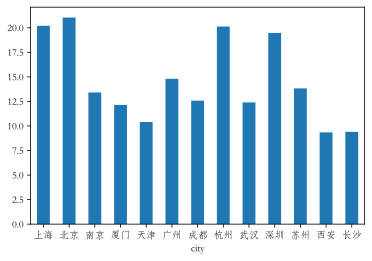

In [25]:
ser.plot(kind = 'bar')
plt.xticks(rotation = 0)  # 横坐标旋转度数
plt.show()

In [26]:
def my_mean(group):
    return np.round(np.mean(group),1)

# SAC --> Split - Aggragate - Combine
df1.groupby('city').msal.agg(['max','min',my_mean,np.ptp])

,max,min,my_mean,ptp
city,,,,
上海,45.0,1.5,20.2,43.5
北京,52.5,2.5,21.0,50.0
南京,60.0,1.5,13.4,58.5
厦门,37.5,3.0,12.1,34.5
天津,37.5,1.5,10.4,36.0
广州,40.0,1.5,14.8,38.5
成都,50.0,1.5,12.6,48.5
杭州,55.0,3.5,20.1,51.5
武汉,150.0,2.5,12.4,147.5


In [27]:
# 对多个列进行数据聚合不同的列使用不同的聚合方式
# 同一个列也可以作用多个聚合函数
df1.groupby('city')[['msal','companyId']].agg({
    'msal':my_mean,
    'companyId':['nunique','count']
})

msal companyId      
     my_mean   nunique count
city                        
上海      20.2       204   365
北京      21.0       246   450
南京      13.4       135   242
厦门      12.1        70   133
天津      10.4        49    75
广州      14.8       124   178
成都      12.6       250   450
杭州      20.1        80   118
武汉      12.4       246   450
深圳      19.5       142   260
苏州      13.8        68    98
西安       9.3       113   169
长沙       9.4        90   152

### 透视表
> 什么是透视表：根据A统计B

In [28]:
# 生成透视表  DataFrame、A、B、聚合函数
pd.pivot_table(data=df1,   # DataFrame
               index = 'city',   # A 被透视对象 原表格数据项(groupby属性)
               values = ['msal','companyId'],   # B 需要透视的数据
               aggfunc = {   # 聚合函数
                   'msal':my_mean,
                   'companyId':'nunique'
               })

,companyId,msal
city,,
上海,204,20.2
北京,246,21.0
南京,135,13.4
厦门,70,12.1
天津,49,10.4
广州,124,14.8
成都,250,12.6
杭州,80,20.1
武汉,246,12.4


In [29]:
df2 = pd.read_excel('../files/data/2020年销售数据.xlsx')
df2

,销售日期,销售信息,销售区域,销售渠道,销售订单,品牌,售价,销售数量,销售额
0,2020-01-01,上海拼多多订单182894-455,上海,拼多多,182894-455,八匹马,99,83,8217
1,2020-01-01,上海抖音订单205635-402,上海,抖音,205635-402,八匹马,219,29,6351
2,2020-01-01,上海天猫订单205654-021,上海,天猫,205654-021,八匹马,169,85,14365
3,2020-01-01,上海天猫订单205654-519,上海,天猫,205654-519,八匹马,169,14,2366
4,2020-01-01,上海天猫订单377781-010,上海,天猫,377781-010,皮皮虾,249,61,15189
...,...,...,...,...,...,...,...,...,...
1940,2020-12-30,北京京东订单D89677,北京,京东,D89677,花花姑娘,269,26,6994
1941,2020-12-30,福建实体订单182719-050,福建,实体,182719-050,八匹马,79,97,7663
1942,2020-12-31,福建实体订单G70083,福建,实体,G70083,花花姑娘,269,55,14795
1943,2020-12-31,福建抖音订单211471-902/704,福建,抖音,211471-902/704,八匹马,59,59,3481


In [30]:
# 月度销售额
pd.pivot_table(data = df2,
               index = '品牌',
               columns= ['销售区域'],
               values = ['销售额'],
               aggfunc =np.sum,
               margins=True,   # 添加总计列
               margins_name='总计')

销售额                                                        \
销售区域          上海          北京         南京        安徽         广东        江苏   
品牌                                                                       
八匹马    1689384.0   1703513.0   317169.0  239382.0   214443.0   24992.0   
啊哟喂     168858.0    259090.0    49847.0   13697.0    26677.0   19104.0   
壁虎     1573379.0   1381350.0   195633.0  148002.0    22146.0    5475.0   
皮皮虾    2939357.0   2365844.0   480544.0   55771.0    95826.0   99989.0   
花花姑娘   5239511.0   6767920.0   724108.0  438611.0  1258857.0  387519.0   
总计    11610489.0  12477717.0  1767301.0  895463.0  1617949.0  537079.0   

                                      
销售区域        浙江          福建        总计  
品牌                                    
八匹马     3927.0   1141836.0   5334646  
啊哟喂     8843.0    147043.0    693159  
壁虎    202228.0   1150766.0   4678979  
皮皮虾        NaN   1854940.0   7892271  
花花姑娘  472864.0   5883642.0  21173032  
总计    687862.0  10178227.0  39772087

In [39]:
# 品牌销售占比
temp = pd.pivot_table(data = df2,
                     index = '品牌',
                     values = '销售额',
                     aggfunc = 'sum',
                   )#   margins=True,margins_name='总计'  - 总计列
                     
temp
# ser = df.groupby('品牌')['销售额'].sum()

,销售额
品牌,
八匹马,5334646
啊哟喂,693159
壁虎,4678979
皮皮虾,7892271
花花姑娘,21173032


<function matplotlib.pyplot.show(close=None, block=None)>

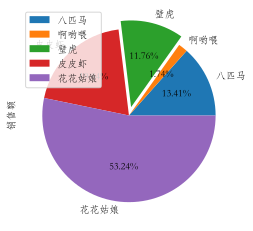

In [44]:
# 品牌销售占比
temp.plot(kind = 'pie',autopct = '%.2f%%',
          subplots=True,pctdistance = 0.6,  # pctdinstance设置占比显示位置
         explode= [0,0,0.1,0,0])  # explode 分离饼图
plt.show

In [47]:
# 各地区销售额
pd.pivot_table(data = df2,
              index = '销售区域',
              values = ['销售额'],
              columns = '品牌',
              aggfunc = 'sum',
              margins=True,
              margins_name='总计')

销售额                                                      
品牌          八匹马       啊哟喂         壁虎        皮皮虾        花花姑娘        总计
销售区域                                                                 
上海    1689384.0  168858.0  1573379.0  2939357.0   5239511.0  11610489
北京    1703513.0  259090.0  1381350.0  2365844.0   6767920.0  12477717
南京     317169.0   49847.0   195633.0   480544.0    724108.0   1767301
安徽     239382.0   13697.0   148002.0    55771.0    438611.0    895463
广东     214443.0   26677.0    22146.0    95826.0   1258857.0   1617949
江苏      24992.0   19104.0     5475.0    99989.0    387519.0    537079
浙江       3927.0    8843.0   202228.0        NaN    472864.0    687862
福建    1141836.0  147043.0  1150766.0  1854940.0   5883642.0  10178227
总计    5334646.0  693159.0  4678979.0  7892271.0  21173032.0  39772087

In [48]:
# 各渠道品牌销量
temp3 = pd.pivot_table(data = df2,
              index = ['销售渠道'],
              columns = ['品牌'],
              values =['销售数量'],
              aggfunc = 'sum',
              margins = True,
              margins_name = '总计')
temp3

销售数量                                   
品牌      八匹马   啊哟喂     壁虎    皮皮虾   花花姑娘      总计
销售渠道                                          
京东     5428   733   3199   3090   9072   21522
天猫     9416   926   4824   5980  15881   37027
实体     3600   462   2174   2684   4991   13911
抖音     2978   541   2065   1995   4966   12545
拼多多    5722   719   3119   3750   9088   22398
总计    27144  3381  15381  17499  43998  107403

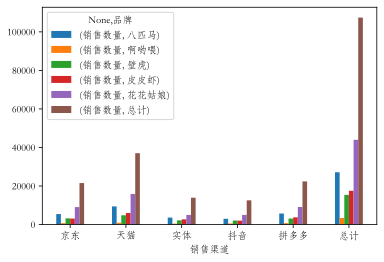

In [52]:
temp3.plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.show()

In [59]:
# 不同售价区间的阅读销量占比
# 分箱，将连续的数据放到离散的箱子中基于分箱的结果在进行分组
print('MAX:',df2['售价'].max())
print('MIN:',df2['售价'].min())
print(df2['售价'].describe())
box = pd.cut(df2['售价'],bins = [50,300,550,800,1050,1300,1550])
temp2 = df2.groupby(box)['销售数量'].count()
temp2

MAX: 1499
MIN: 59
count    1945.000000
mean      375.441131
std       239.885397
min        59.000000
25%       199.000000
50%       329.000000
75%       469.000000
max      1499.000000
Name: 售价, dtype: float64


售价
(50, 300]       917
(300, 550]      745
(550, 800]      171
(800, 1050]      74
(1050, 1300]     32
(1300, 1550]      6
Name: 销售数量, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

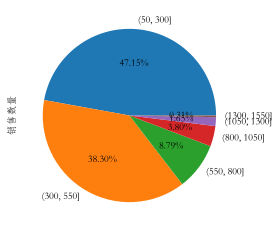

In [60]:
temp2.plot(kind = 'pie',autopct = '%.2f%%')
plt.show